# Deep Learning and machine Learning implementation. (part 2)

## Implementing the CNN

### (Step One) product categirization

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import os
import glob
import numpy as np

# I use skimage a class in scikit-image library for reading the images. Advantage of this
#  class over cv2 and pillow is that I can  readily change the dtype of the numpy array 
# elements into a float type. I need that to normalize the array.

from skimage.io import imread
from skimage import exposure, color
from skimage.transform import resize


import cv2
import keras

# I use the imageDataGenerator to create the augmented images

from keras.preprocessing.image import ImageDataGenerator

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split 

from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam

Using TensorFlow backend.


## loading the traing and validation data

In [2]:
import pickle

X_train = pickle.load( open("pickleDump/x_train.p", "rb"))
Y_product_train = pickle.load( open("pickleDump/y_product_train.p", "rb"))
Y_brand_train = pickle.load( open("pickleDump/y_brand_train.p", "rb"))
Y_multilabel_train = pickle.load( open("pickleDump/y_multilabel_train.p", "rb"))

In [15]:
data, product_Label, MultiLabel = shuffle(X_train,
        Y_product_train, Y_multilabel_train, random_state=2)

data = data.reshape(2000,150,150,1)

train_data = [data, product_Label, MultiLabel]


print(train_data[0].shape)
print(train_data[1].shape)
print(train_data[2].shape)

(2000, 150, 150, 1)
(2000, 1)
(2000, 17)


Test that after shuffle label and image are still match each other

[[2.]]
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


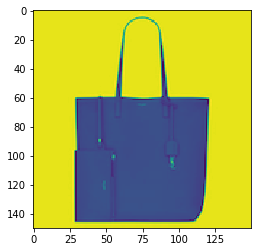

[[7.]]
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


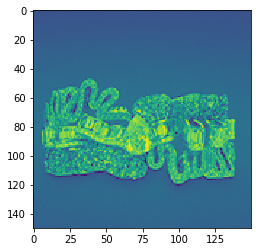

[[5.]]
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


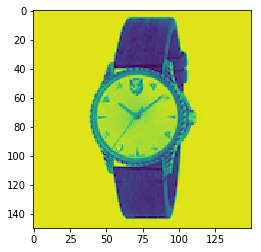

[[6.]]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


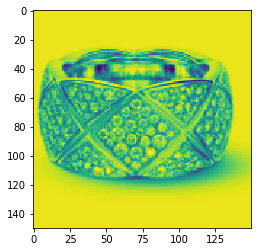

[[0.]]
[[0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


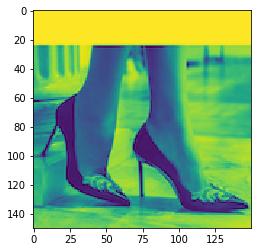

[[1.]]
[[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


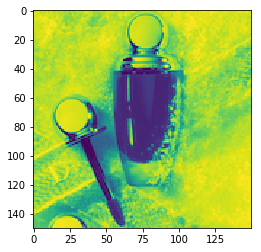

[[3.]]
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


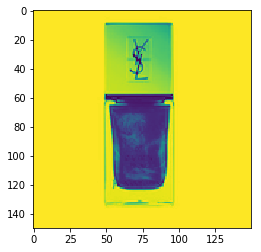

[[5.]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


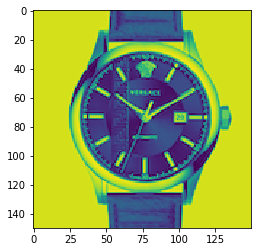

[[6.]]
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


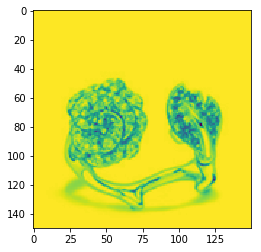

[[6.]]
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


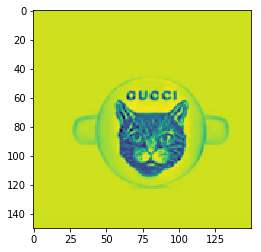

In [20]:
target_image = np.array([])
target_image = train_data[0].reshape(2000,22500)
for i in range(145,155): 
        image = target_image[i:i+1].reshape(150,150)
        print( product_Label[i:i+1])
        print(  X_train, X_test, Y_train, Y_test = train_test_split(data,
                     product_Label, test_size=0.1, random_state=2)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255.
X_test /= 255.

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)[i:i+1])

        plt.imshow(image)
        plt.show()

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(data,
                     product_Label, test_size=0.1, random_state=2)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255.
X_test /= 255.

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1800, 150, 150, 1)
(200, 150, 150, 1)
(1800, 1)
(200, 1)


product_label is [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


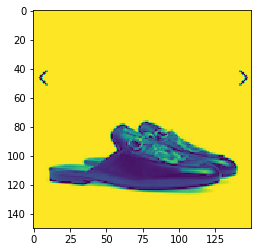

In [50]:
from keras.utils import to_categorical

#one-hot encode target column
y_train = to_categorical(Y_train,10)
y_test = to_categorical(Y_test,10)

# A sample to make sure everything looks fine
product_label = y_train[150]
print('product_label is {}'.format(product_label))
train_image = np.array([])
train_image = X_train.reshape(1800,22500)
image = X_train[150].reshape(150,150)
plt.imshow(image)
plt.show()

In [58]:
''' 
 Model structure for the catagorization part, Note that the activation 
 function in last layer is softmax which is  necessary with the
 catagorization.
'''

batch_size = 32
num_classes = 10


model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation="relu"
                 , input_shape=(150,150,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# model.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu"))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))



In [68]:
epochs = 75
opt = Adam(lr=1e-3, decay=1e-3 / epochs)
model.compile(loss="binary_crossentropy", optimizer=opt,
              metrics=['accuracy'])

In [69]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 16)      160       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 36, 36, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 41472)             0         
__________

In [70]:

augmentation=False

if augmentation==True:
    datagen = ImageDataGenerator(
            rotation_range=0,
            width_shift_range=0,
            height_shift_range=0,
            shear_range=0,
            zoom_range=0,
            horizontal_flip=True,
            fill_mode='nearest',
#             preprocessing_function = contrast_adjusment,
#             preprocessing_function = HE,
            preprocessing_function = AHE)

    datagen.fit(x_train)
    
    print("Running augmented training now, with augmentation")
    history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    epochs=epochs,
                    validation_data=(X_test, y_test))
else:
    print("Running regular training, no augmentation")
    history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))

Running regular training, no augmentation
Train on 1800 samples, validate on 200 samples
Epoch 1/75
1800/1800 [==============================] - 2s 1ms/step - loss: 0.2462 - acc: 0.9181 - val_loss: 0.2514 - val_acc: 0.9160
Epoch 2/75
1800/1800 [==============================] - 1s 571us/step - loss: 0.2416 - acc: 0.9189 - val_loss: 0.2491 - val_acc: 0.9180
Epoch 3/75
1800/1800 [==============================] - 1s 579us/step - loss: 0.2398 - acc: 0.9204 - val_loss: 0.2458 - val_acc: 0.9185
Epoch 4/75
1800/1800 [==============================] - 1s 586us/step - loss: 0.2425 - acc: 0.9194 - val_loss: 0.2490 - val_acc: 0.9155
Epoch 5/75
1800/1800 [==============================] - 1s 591us/step - loss: 0.2451 - acc: 0.9181 - val_loss: 0.2470 - val_acc: 0.9210
Epoch 6/75
1800/1800 [==============================] - 1s 599us/step - loss: 0.2415 - acc: 0.9192 - val_loss: 0.2479 - val_acc: 0.9190
Epoch 7/75
1800/1800 [==============================] - 1s 597us/step - loss: 0.2420 - acc: 0.918

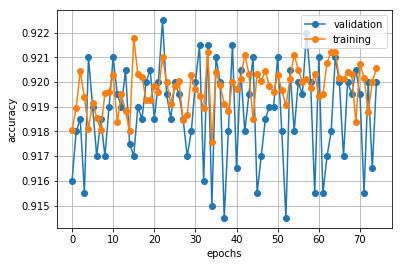

In [71]:
plt.plot(history.epoch,history.history['val_acc'],'-o',label='validation')
plt.plot(history.epoch,history.history['acc'],'-o',label='training')

plt.legend(loc=0)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid(True)

In [ ]:
# define functions that generate the augemnted images


def imgGen(img, zca=False, rotation=30., w_shift=0.,
           h_shift=0., shear=0., zoom=0., h_flip=False, v_flip=False,
           preprocess_fcn=None, batch_size=9):
    datagen = ImageDataGenerator(
            zca_whitening=zca,
            rotation_range=rotation,
            width_shift_range=w_shift,
            height_shift_range=h_shift,
            shear_range=shear,
            zoom_range=zoom,
            fill_mode='nearest',
            horizontal_flip=h_flip,
            vertical_flip=v_flip,
            preprocessing_function=preprocess_fcn,
            data_format=K.image_data_format())
    
    datagen.fit(img)

    i=0
    for img_batch in datagen.flow(img, batch_size=9, shuffle=False):
        for img in img_batch:
            plt.subplot(330 + 1 + i)
            plt.imshow(img)
            i=i+1    
        if i >= batch_size:
            break
    plt.show()
    
# Contrast stretching
def contrast_stretching(img):
    p2, p98 = np.percentile(img, (2, 98))
    img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))
    return img_rescale

# Histogram equalization
def HE(img):
    img_eq = exposure.equalize_hist(img)
    return img_eq

In [ ]:
batch_size = 64
num_classes = 10
epochs = 200
    
datagen = ImageDataGenerator(
            rotation_range=30,
            width_shift_range=0.25,
            height_shift_range=0,
            shear_range=0,
            zoom_range=0,
            horizontal_flip=True,
            fill_mode='nearest',
           # preprocessing_function = contrast_adjusment,
            preprocessing_function = HE)

datagen.fit(X_train)
print(X_train.shape[0])    
    
print("Running augmented training now, with augmentation")
history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=batch_size),
                    steps_per_epoch=X_train.shape[0] // batch_size,
                    epochs=epochs,
                    validation_data=(X_test, Y_test))

In [ ]:
plt.plot(history.epoch,history.history['val_acc'],'-o',label='validation')
plt.plot(history.epoch,history.history['acc'],'-o',label='training')

plt.legend(loc=0)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid(True)

### (step two) the multi label categorization. Note that here we use sigmoid activation function in the last layer

In [79]:
X_train_ml, X_test_ml, Y_train_ml, Y_test_ml = train_test_split(data,
                     MultiLabel, test_size=0.1, random_state=2)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255.
X_test /= 255.

print(X_train_ml.shape)
print(X_test_ml.shape)
print(Y_train_ml.shape)
print(Y_test_ml.shape)

(1800, 150, 150, 1)
(200, 150, 150, 1)
(1800, 17)
(200, 17)


In [80]:
''' 
 Model structure for the multiLabel part, Note that the activation 
 function in last layer is sigmoid which is  necessary with the
 catagorization.
'''

batch_size = 32
num_classes = 17


model_ml = Sequential()
model_ml.add(Conv2D(filters=16, kernel_size=(3, 3), activation="relu"
                 , input_shape=(150,150,1)))
model_ml.add(MaxPooling2D(pool_size=(2, 2)))
model_ml.add(Dropout(0.25))
model_ml.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model_ml.add(MaxPooling2D(pool_size=(2, 2)))
model_ml.add(Dropout(0.25))
# model.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu"))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
model_ml.add(Flatten())
model_ml.add(Dense(32, activation='relu'))
model_ml.add(Dropout(0.25))
model_ml.add(Dense(64, activation='relu'))
model_ml.add(Dropout(0.5))
model_ml.add(Dense(17, activation='sigmoid'))

In [81]:
epochs = 75
opt = Adam(lr=1e-3, decay=1e-3 / epochs)
model_ml.compile(loss="binary_crossentropy", optimizer=opt,
              metrics=['accuracy'])

In [84]:

augmentation=False

if augmentation==True:
    datagen = ImageDataGenerator(
            rotation_range=0,
            width_shift_range=0,
            height_shift_range=0,
            shear_range=0,
            zoom_range=0,
            horizontal_flip=True,
            fill_mode='nearest',
#             preprocessing_function = contrast_adjusment,
#             preprocessing_function = HE,
            preprocessing_function = AHE)

    datagen.fit(x_train)
    
    print("Running augmented training now, with augmentation")
    history = model_ml.fit_generator(datagen.flow(x_train_ml, Y_test_ml, batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    epochs=epochs,
                    validation_data=(X_test_ml, Y_test_ml))
else:
    print("Running regular training, no augmentation")
    history = model_ml.fit(X_train_ml, Y_train_ml,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test_ml, Y_test_ml))

Running regular training, no augmentation
Train on 1800 samples, validate on 200 samples
Epoch 1/75
1800/1800 [==============================] - 3s 1ms/step - loss: 0.5155 - acc: 0.7768 - val_loss: 0.5413 - val_acc: 0.8824
Epoch 2/75
1800/1800 [==============================] - 1s 660us/step - loss: 0.4138 - acc: 0.8608 - val_loss: 0.4632 - val_acc: 0.8824
Epoch 3/75
1800/1800 [==============================] - 1s 652us/step - loss: 0.3938 - acc: 0.8758 - val_loss: 0.4686 - val_acc: 0.8824
Epoch 4/75
1800/1800 [==============================] - 1s 644us/step - loss: 0.3849 - acc: 0.8784 - val_loss: 0.4438 - val_acc: 0.8824
Epoch 5/75
1800/1800 [==============================] - 1s 642us/step - loss: 0.3746 - acc: 0.8808 - val_loss: 0.4206 - val_acc: 0.8824
Epoch 6/75
1800/1800 [==============================] - 1s 656us/step - loss: 0.3696 - acc: 0.8813 - val_loss: 0.4167 - val_acc: 0.8824
Epoch 7/75
1800/1800 [==============================] - 1s 655us/step - loss: 0.3632 - acc: 0.881

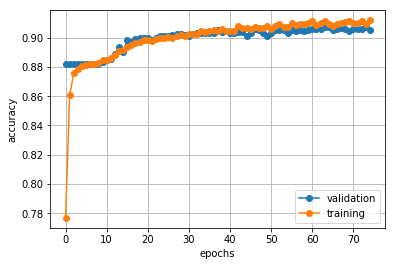

In [85]:
plt.plot(history.epoch,history.history['val_acc'],'-o',label='validation')
plt.plot(history.epoch,history.history['acc'],'-o',label='training')

plt.legend(loc=0)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid(True)

In [6]:
# ap = argparse.ArgumentParser()
# ap.add_argument("-m", "--model", required=True,
# 	help="path to trained model model")
# ap.add_argument("-l", "--labelbin", required=True,
# 	help="path to label binarizer")
# ap.add_argument("-i", "--image", required=True,
# 	help="path to input image")
# args = vars(ap.parse_args())

In [5]:
#image = cv2.imread(args["image"])
#output = imutils.resize(image)
 
# pre-process the image for classification
#image = cv2.resize(image, (150, 150))
#image = image.astype("float") / 255.0
#image = img_to_array(image)
#image = np.expand_dims(image, axis=0)

In [7]:

import pickle

X_valid = pickle.load( open("../pickleDump/x_test.p", "rb"))
Y_product_valid = pickle.load( open("../pickleDump/y_product_test.p", "rb"))
Y_brand_valid = pickle.load( open("../pickleDump/y_brand_test.p", "rb"))
Y_multilabel_valid = pickle.load( open("../pickleDump/y_multilabel_test.p", "rb"))

In [ ]:
# load the trained convolutional neural network and the multi-label
# binarizer
#print("[INFO] loading network...")
#model = load_model(args["model"])
#mlb = pickle.loads(open(args["labelbin"], "rb").read())
 
# classify the input image then find the indexes of the two class
# labels with the *largest* probability
#print("[INFO] classifying image...")
proba = model.predict(image)[0]
#idxs = np.argsort(proba)[::-1][:2]

In [ ]:
# loop over the indexes of the high confidence class labels
for (i, j) in enumerate(idxs):
	# build the label and draw the label on the image
	label = "{}: {:.2f}%".format(mlb.classes_[j], proba[j] * 100)
	cv2.putText(output, label, (10, (i * 30) + 25), 
		cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
 
# show the probabilities for each of the individual labels
for (label, p) in zip(mlb.classes_, proba):
	print("{}: {:.2f}%".format(label, p * 100))
 
# show the output image
cv2.imshow("Output", output)
cv2.waitKey(0)